# Unit 2 Lecture 5 - Delta Method and Confidence Intervals

### An estimator $\hat{\theta}_n$ of $\theta$ is asymptotically normal if...

- $\sqrt{n}(\hat{\theta}_n - \theta) \xrightarrow[n \to \infty]{(d)} \mathcal{N}(0, V)$

The quantity $\sigma^2$ is then called asymptotic variance of $\hat{\theta}_n$.

Two non-asymptotic variances will depend on $n$ in the same way (being divided by it), so smaller asymptotic variance corresponds to a smaller non-aysmptotic variance. And, a smaller non-asymptotic variance will shrink faster, which means it needs less samples ($n$) to be more accurate, not accounting for bias.

Asymptotic variance follows naturally from:

- $var(\hat{\theta}_n)\xrightarrow[n \to \infty]{} 0$

# CI Types

Or, dealing with not knowing the variance of a model in a few ways.

## Conservative

Choose the most conservative variance of a model to get your bounds

e.g. Estimating the mean of a Bernoulli, which has a maximum variance of $p(1-p) = 1/4$

### - $\mathcal{I}_{conserv} = [\bar{R}_n \pm \frac{q_{\alpha/2}\sqrt{1/4}}{\sqrt{n}}]$

## Solve

Sometimes you can turn your inequality into a quadratic inequality where the roots give you your upper and lower bounds.

e.g. Estimating $\lambda$ of a Poisson with mean and variance $\lambda$

- $(\hat{\lambda}_n - \lambda) \leq \frac{q_{\alpha/2}\sqrt{\lambda}}{\sqrt{n}}$

- $(\hat{\lambda}_n - \lambda)^2 \leq (\frac{q_{\alpha/2}\sqrt{\lambda}}{\sqrt{n}})^2$

### - $\lambda^2 + (-2 \hat{\lambda}_n - \frac{q_{\alpha/2}}{\sqrt{n}}) \lambda + \hat{\lambda}_n^2 \leq 0$ 

is in the form $Ax^2 + Bx + C <= 0$.  Just solve for upper and lower bounds of x.

## Plug-in

As long as you already have an estimator for $\sigma^2$, you might as well just plug it in.

e.g. Estimating $\lambda$ of an exponential with mean $1/\lambda$ and variance $1/\lambda^2$

### - $\mathcal{I}_{plug-in} = [\frac{1}{\bar{X}_n} \pm \frac{q_{\alpha/2}\frac{1}{\bar{X}_n}}{\sqrt{n}}]$

# CI Properties

<ul>
    <li>An Interval $\mathcal{I}$ is random, but it isn't a CI until it doesn't depend on unknown parameters.</li>
    <li><b>(Sim 1)</b> A Confidence Interval $\mathcal{I}$ is also random until estimators are replaced with estimations. The result (whether or not $\theta$ is captured) is then deterministic, like an unknown 0 or 1 result in a Bernoulli Trial where $p=1-\alpha$.</li>
    <li>It doesn't have to be centered around the estimated parameter. However, since the majority of the distribution is centered around the mean, a non-centered CI will be wider.</li>
</ul>

# Delta Method

Or, understanding what happens to variance when estimating through the filter of a function $g$

- $\sqrt{n}(g(\hat{\theta}) - g(\theta)) \xrightarrow{(d)}{} \mathcal{N}(0, g\prime(E[X])^2\sigma^2)$

Where $\theta$ is a parameter, and $\sigma^2$ is the variance of, an RV $X$. To estimate the variance of your estimator, you just need estimators for the mean and variance of $X$. In the case of Bernoulli, exponential, poisson, and others, you're estimating everything at once with the sample mean.

In the case of an exponential, instead of using $\bar{X}_n$ to estimate $\frac{1}{\lambda}$, $g$ can be used to estimate $\lambda$ directly. If $\bar{X}_n \to \frac{1}{\lambda}$, then $g(\bar{X}_n) = \frac{1}{\bar{X}_n} \to \lambda$. 

- $g$ must be continuously differentiable on the domain of $g^{-1}(\theta)$

# Simulations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

### 1. Confidence intervals capturing or not capturing the estimated parameter

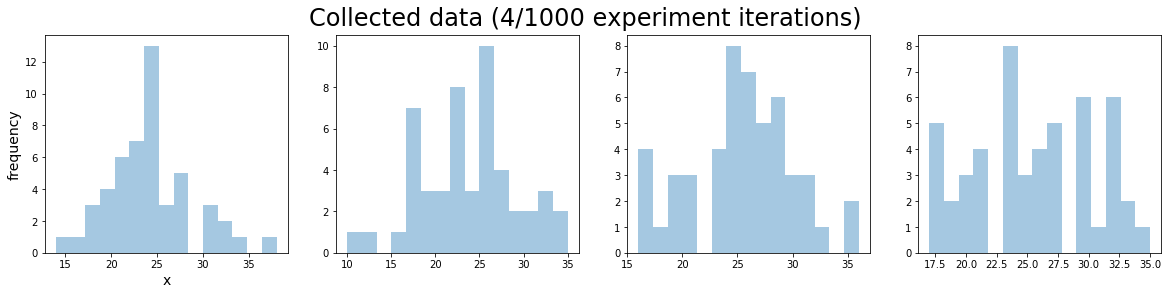

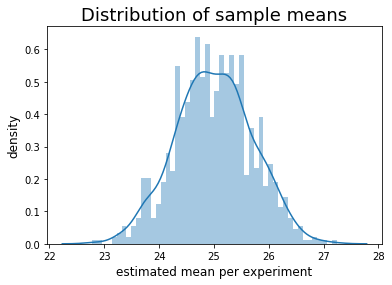

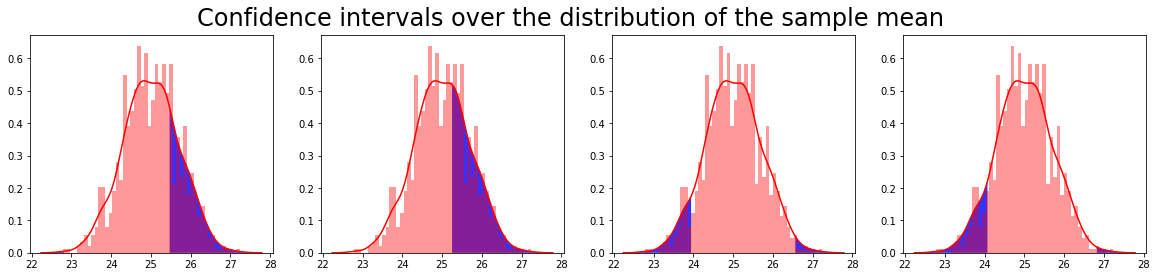

In [3]:
n = 50 
mean = 25
experiment_count = 1000
samples = np.array([np.random.poisson(mean, n) for i in range(experiment_count)])
sample_means = np.mean(samples, axis=1)
est_stds = \
    np.sqrt(
        1 / n * np.sum(np.square([samples[i] - sample_means[i] for i in range(experiment_count)]), 
                       axis=1)
    ) 

display(HTML('<h4>First let\'s see some of the samples we\'re going to be using. Think of each of these as\n a data set from one experiment. So, what we have is 1000 data sets from 1000 experiments.'))

fig = plt.figure(figsize=(20,4))
fig.suptitle("Collected data (4/1000 experiment iterations)", fontsize=24)
for i in range(4):
    plt.subplot(1, 4, i+1)
    if i == 0:
        plt.xlabel('x', fontsize=14)
        plt.ylabel('frequency', fontsize=14)
    sns.distplot(samples[i], kde=False, bins=15)
plt.show()

display(HTML('<h4>Now let\'s plot the sample mean from every experiment and see the distribution of sample means.</h4>'))
             
proportion_bad_CIs = (np.sum(sample_means - 1.96 * est_stds / np.sqrt(n) > mean) \
    + np.sum(sample_means + 1.96 * est_stds / np.sqrt(n) < mean)) \
    / experiment_count

plt.title('Distribution of sample means', fontsize=18)
plt.xlabel('estimated mean per experiment', fontsize=12)
plt.ylabel('density', fontsize=12)
ax = sns.distplot(sample_means, bins=50)
plt.show()
             
display(HTML('<h4>This is a simulated distribution of the sample mean RV, from which we pulled 1000 samples.\nWe\'re reconstructing it with data!</h4>'))
display(HTML('<h4>And, we can see that the expected value of is distribution is the parameter, lambda=25, the mean of a poisson.</h4>'))
display(HTML('<h4>Normally we construct a distribution around our estimate and show the error bars on that distribution. Here\'s another way.</h4>'))
display(HTML('<h4>Let\'s instead lay some CIs from sample mean estimates over the distribution of the sample means to show how they vary around the expected value.</h4>'))
             
fig = plt.figure(figsize=(20, 4))
plt.suptitle('Confidence intervals over the distribution of the sample mean', fontsize=24)
for i in range(4):
    plt.subplot(1, 4, i+1)
    ax = sns.distplot(sample_means, bins=50, color='red')
    x, y = ax.get_lines()[-1].get_data()
    mask = x < sample_means[i] - 1.96 * est_stds[i] / np.sqrt(n) 
    x_1, y_1 = x[mask], y[mask]
    ax.fill_between(x_1, y1=y_1, facecolor='blue', alpha=0.8)
    mask = x > sample_means[i] + 1.96 * est_stds[i] / np.sqrt(n)
    x_2, y_2 = x[mask], y[mask]
    ax.fill_between(x_2, y1=y_2, facecolor='blue', alpha=0.8)
plt.show() 

ci_l = sample_means[0] - 1.96 * est_stds[0] / np.sqrt(n) 
ci_r = sample_means[0] + 1.96 * est_stds[0] / np.sqrt(n)
captured = ci_l < mean and ci_r > mean
cap_or_not = 'captured' if captured else 'did not capture'
             
display(HTML(f'<h4> Proportion of CIs that fail to capture the mean at $alpha = 0.05$: {proportion_bad_CIs}</h4>\n' \
            + '(the proportion will converge to at most 0.05 as n goes to infinity)'))
display(HTML(f'<h4> We {cap_or_not} the mean (25) in our first experiment iteration\n' \
             f'with our confidence interval [{ci_l:.2f}, {ci_r:.2f}]</h4>'))
display(HTML(f'<h4>Note that if we had only run this experiment once, we would have to\n rely on our confidence, rather than knowing whether or not the parameter was captured.</h4>'))